# Problem Statement

This data set contains a survey on air passenger satisfaction of Ratra Airlines.

The following classification problem is set to predict which of the two levels of satisfaction with the airline the passenger belongs to :

- Satisfaction
- Neutral or dissatisfied



# Data Desription

- Gender : male or female
- Customer type : regular or non-regular airline customer
- Age : the actual age of the passenger
- Type of travel : the purpose of the passenger's flight (personal or business travel)
- Class : business, economy, economy plus
- Flight distance
- Inflight wifi service : satisfaction level with Wi-Fi service on board (0 : not rated, 1-5)
- Departure/Arrival time convenient: departure/arrival time satisfaction level (0 : not rated, 1-5)
- Ease of Online booking : online booking satisfaction rate (0 : not rated, 1-5)
- Gate location : level of satisfaction with the gate location (0 : not rated, 1-5)
- Food and drink : food and drink satisfaction level (0 : not rated, 1-5)
- Online boarding : satisfaction level with online boarding (0 : not rated, 1-5)
- Seat comfort : seat satisfaction level (0 : not rated, 1-5)
- Inflight entertainment : satisfaction with inflight entertainment (0 : not rated, 1-5)
- On-board service : level of satisfaction with on-board service (0 : not rated, 1-5)
- Leg room service : level of satisfaction with leg room service (0 : not rated, 1-5)
- Baggage handling : level of satisfaction with baggage handling (0 : not rated, 1-5)
- Checkin service : level of satisfaction with checkin service (0 : not rated, 1-5)
- Inflight service : level of satisfaction with inflight service (0 : not rated, 1-5)
- Cleanliness : level of satisfaction with cleanliness (0 : not rated, 1-5)
- Departure delay in minutes
- Arrival delay in minutes


# Imorting libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import accuracy_score
%matplotlib inline

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

- **Load of Data**

In [2]:
df = pd.read_csv("D:\Projects\ML\Airline_Customer_Satisfaction_Dataset\AirplaneServices.csv")

In [3]:
df.head(10)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,48,Business travel,Business,821,3,3,3,...,5,3,2,5,4,5,5,2,5.0,neutral or dissatisfied
1,2,Female,Loyal Customer,35,Business travel,Business,821,2,2,2,...,5,5,5,5,3,5,5,26,39.0,satisfied
2,3,Male,Loyal Customer,41,Business travel,Business,853,4,4,4,...,3,3,3,3,4,3,5,0,0.0,satisfied
3,4,Male,Loyal Customer,50,Business travel,Business,1905,2,2,2,...,5,5,5,5,3,5,4,0,0.0,satisfied
4,5,Female,Loyal Customer,49,Business travel,Business,3470,3,3,3,...,3,3,4,3,3,3,5,0,1.0,satisfied
5,6,Male,Loyal Customer,43,Business travel,Business,3788,4,4,4,...,4,4,4,4,3,4,3,0,0.0,satisfied
6,7,Male,Loyal Customer,43,Business travel,Business,1963,3,3,3,...,5,5,5,5,4,5,4,0,0.0,satisfied
7,8,Female,Loyal Customer,60,Business travel,Business,853,4,3,4,...,3,3,4,3,3,3,4,0,3.0,satisfied
8,9,Male,Loyal Customer,50,Business travel,Business,2607,4,1,1,...,4,4,4,4,3,4,3,0,0.0,neutral or dissatisfied
9,10,Female,Loyal Customer,38,Business travel,Business,2822,2,2,5,...,5,5,5,5,3,5,4,13,0.0,satisfied


- **Shape of Data**

In [4]:
print("The shape of dataset is :", df.shape)

The shape of dataset is : (50000, 24)


### **Observation**
- **Dataset Contains 50000 Rows and 24 Columns**

- **Column Names**

In [5]:
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

 - **Datatypes of Columns**

In [6]:
df.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

# Observation
- Dataset contains 18 int type columns.
- Dataset contains 1 float type columns.
- Dataset contain 5 object type column.

- **Checking for null counts in features**

In [7]:
df.isnull().sum().sort_values(ascending = False)

Arrival Delay in Minutes             158
id                                     0
Gender                                 0
Departure Delay in Minutes             0
Cleanliness                            0
Inflight service                       0
Checkin service                        0
Baggage handling                       0
Leg room service                       0
On-board service                       0
Inflight entertainment                 0
Seat comfort                           0
Online boarding                        0
Food and drink                         0
Gate location                          0
Ease of Online booking                 0
Departure/Arrival time convenient      0
Inflight wifi service                  0
Flight Distance                        0
Class                                  0
Type of Travel                         0
Age                                    0
Customer Type                          0
satisfaction                           0
dtype: int64

## Observations
 **Only arrival time delay has null values**

- **Checking for Category Distribution in Columns**

In [8]:
for col in df.columns:
    print("-"*50)
    print("category count for col {}".format(col))
    print(df[col].value_counts().count())

--------------------------------------------------
category count for col id
50000
--------------------------------------------------
category count for col Gender
2
--------------------------------------------------
category count for col Customer Type
2
--------------------------------------------------
category count for col Age
75
--------------------------------------------------
category count for col Type of Travel
2
--------------------------------------------------
category count for col Class
3
--------------------------------------------------
category count for col Flight Distance
3462
--------------------------------------------------
category count for col Inflight wifi service
6
--------------------------------------------------
category count for col Departure/Arrival time convenient
6
--------------------------------------------------
category count for col Ease of Online booking
6
--------------------------------------------------
category count for col Gate location


- **Null Imputation**

In [9]:
df["Arrival Delay in Minutes"].fillna(df["Arrival Delay in Minutes"].median(), inplace=True)

- **Data Description**

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,50000.0,42942.46444,28035.881699,1.0,12500.75,50719.5,68216.25,80716.0
Age,50000.0,39.58624,15.139425,7.0,27.00,40.0,51.00,85.0
Flight Distance,50000.0,1180.47108,1017.147731,56.0,399.00,802.0,1744.00,4963.0
Inflight wifi service,50000.0,2.72356,1.328961,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,50000.0,3.06092,1.526190,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,50000.0,2.75770,1.409706,0.0,2.00,3.0,4.00,5.0
Gate location,50000.0,2.97972,1.282974,1.0,2.00,3.0,4.00,5.0
Food and drink,50000.0,3.20054,1.329330,0.0,2.00,3.0,4.00,5.0
Online boarding,50000.0,3.25346,1.351819,0.0,2.00,3.0,4.00,5.0
Seat comfort,50000.0,3.43962,1.320223,0.0,2.00,4.0,5.00,5.0


In [11]:
df.describe(include=object).T

,count,unique,top,freq
Gender,50000,2,Female,25224
Customer Type,50000,2,Loyal Customer,40883
Type of Travel,50000,2,Business travel,34598
Class,50000,3,Business,24513
satisfaction,50000,2,neutral or dissatisfied,28322


# Categorical and continous column distribution

here we will distribute features into categorical and continuous columns based on types variations in features.
If feature has more than 6 types it will treated as continuous else categorical.

In [12]:
categorical_col, continuous_col = [], []           #creating two categories for column distribution

def categorical_continuous_columns(df):            #defining a function

     for col in df.columns:                        #for loop to check for all column in data.columns
        if df[col].value_counts().count()<7:       #cheking if varieties are less than 7
            categorical_col.append(col)            #if condition is true column will add into categorical_col
        else:
            continuous_col.append(col)             #if above condition is false col will add in continuous_col
     return categorical_col,continuous_col

In [13]:
categorical_col, continuous_col = categorical_continuous_columns(df)

In [14]:
#Categorical column
categorical_col

['Gender',
 'Customer Type',
 'Type of Travel',
 'Class',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'satisfaction']

In [15]:
#Continuous column
continuous_col

['id',
 'Age',
 'Flight Distance',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

# **Uni variate analysis for categorical column**
- ***Using Pie Chart and Countplot***


--------------------------------------------------
value_counts for category Gender

Gender
Female    25224
Male      24776
Name: count, dtype: int64
--------------------------------------------------


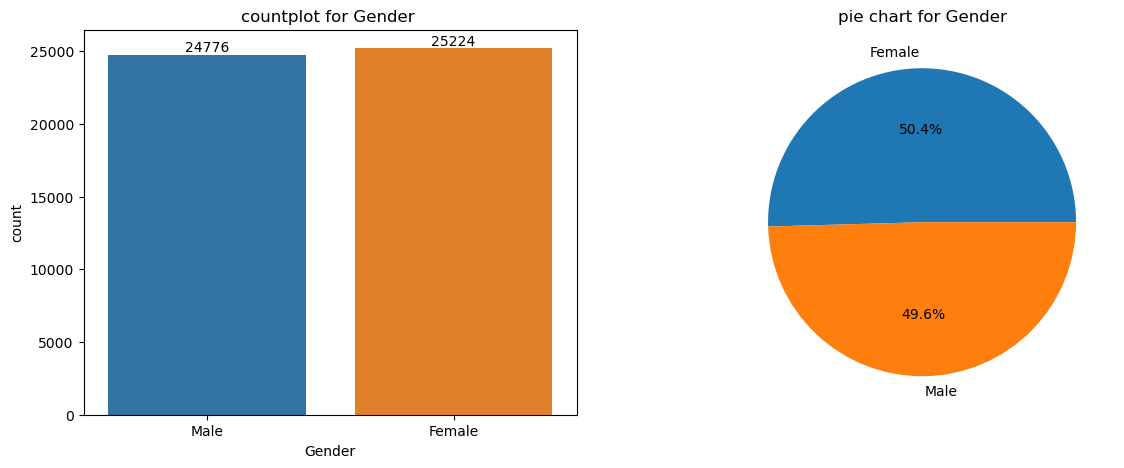

--------------------------------------------------
value_counts for category Customer Type

Customer Type
Loyal Customer       40883
disloyal Customer     9117
Name: count, dtype: int64
--------------------------------------------------


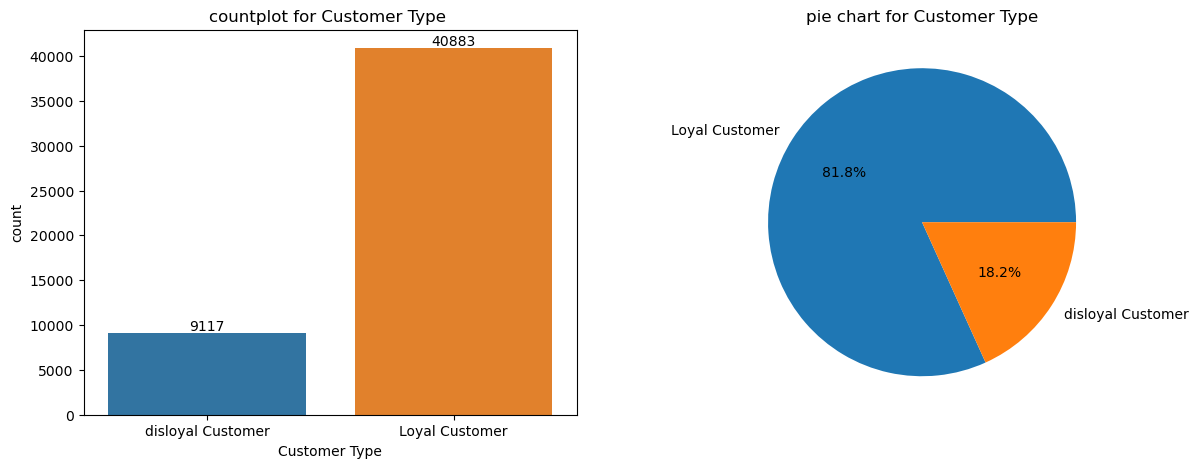

--------------------------------------------------
value_counts for category Type of Travel

Type of Travel
Business travel    34598
Personal Travel    15402
Name: count, dtype: int64
--------------------------------------------------


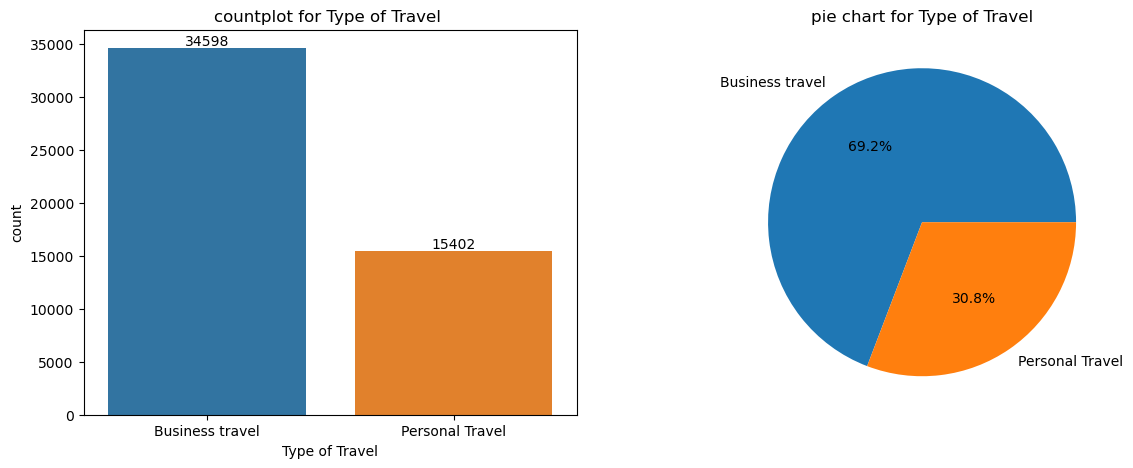

--------------------------------------------------
value_counts for category Class

Class
Business    24513
Eco         21996
Eco Plus     3491
Name: count, dtype: int64
--------------------------------------------------


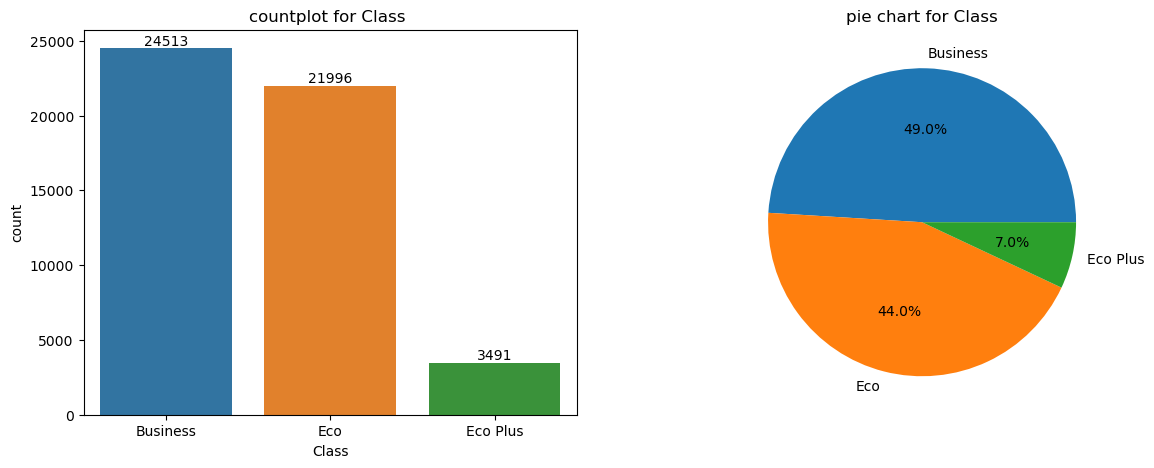

--------------------------------------------------
value_counts for category Inflight wifi service

Inflight wifi service
2    12447
3    12445
4     9466
1     8620
5     5493
0     1529
Name: count, dtype: int64
--------------------------------------------------


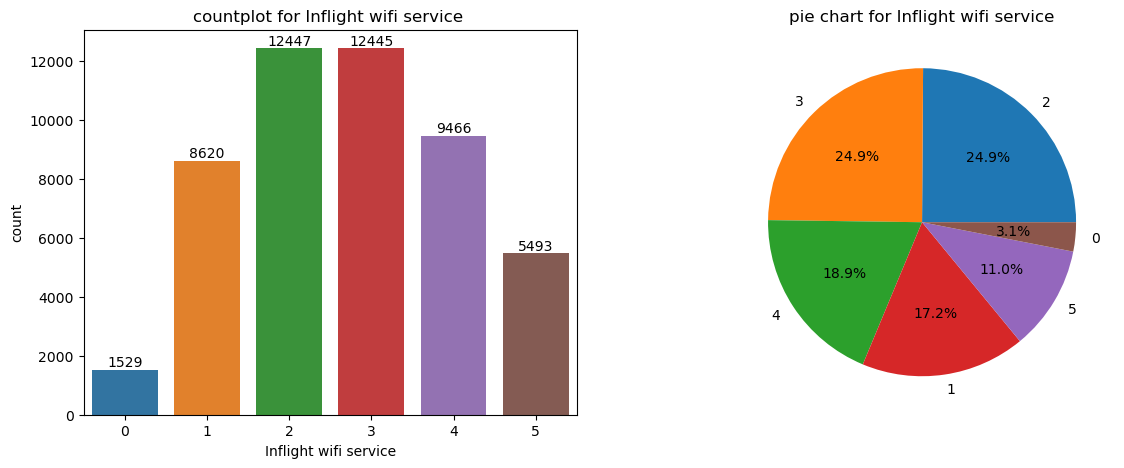

--------------------------------------------------
value_counts for category Departure/Arrival time convenient

Departure/Arrival time convenient
4    12264
5    10800
3     8717
2     8203
1     7433
0     2583
Name: count, dtype: int64
--------------------------------------------------


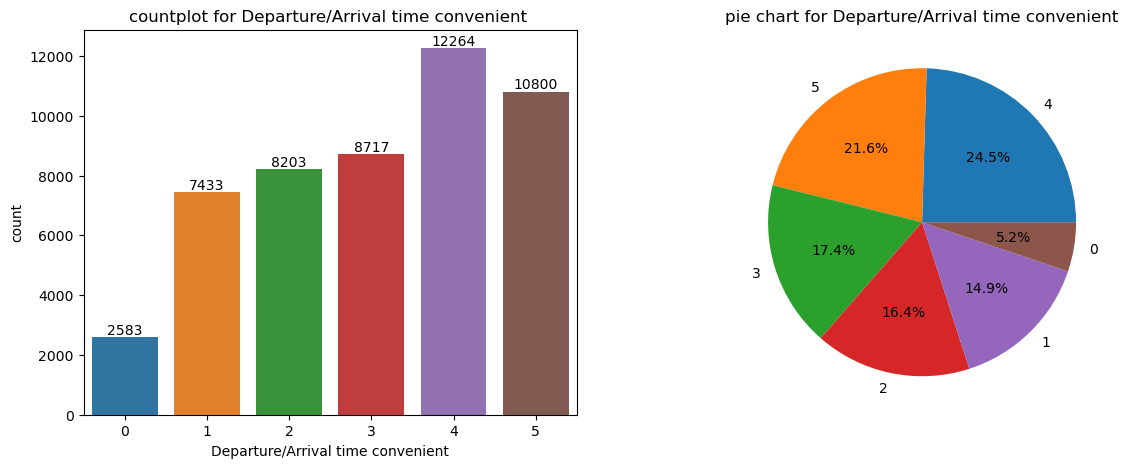

--------------------------------------------------
value_counts for category Ease of Online booking

Ease of Online booking
3    11655
2    11476
4     9410
1     8348
5     6796
0     2315
Name: count, dtype: int64
--------------------------------------------------


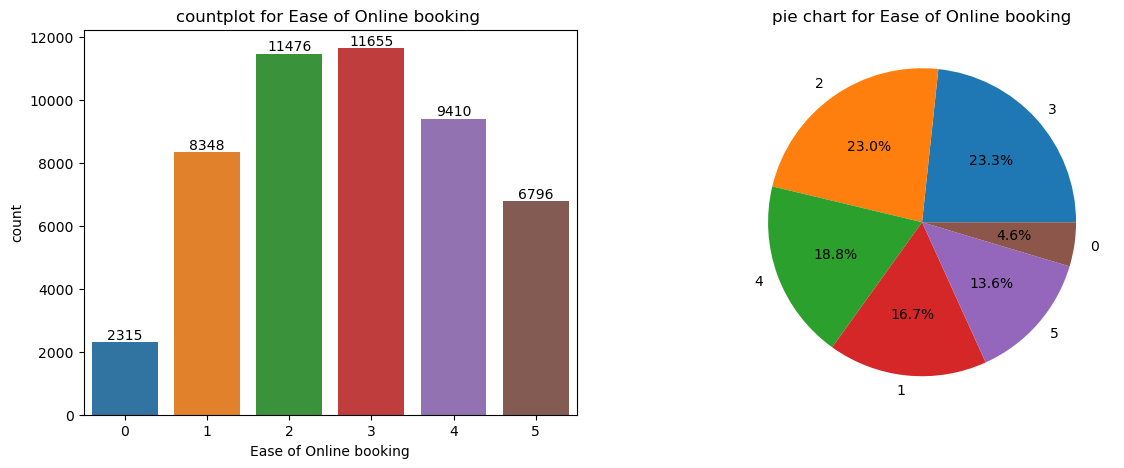

--------------------------------------------------
value_counts for category Gate location

Gate location
3    13712
4    11689
2     9255
1     8534
5     6810
Name: count, dtype: int64
--------------------------------------------------


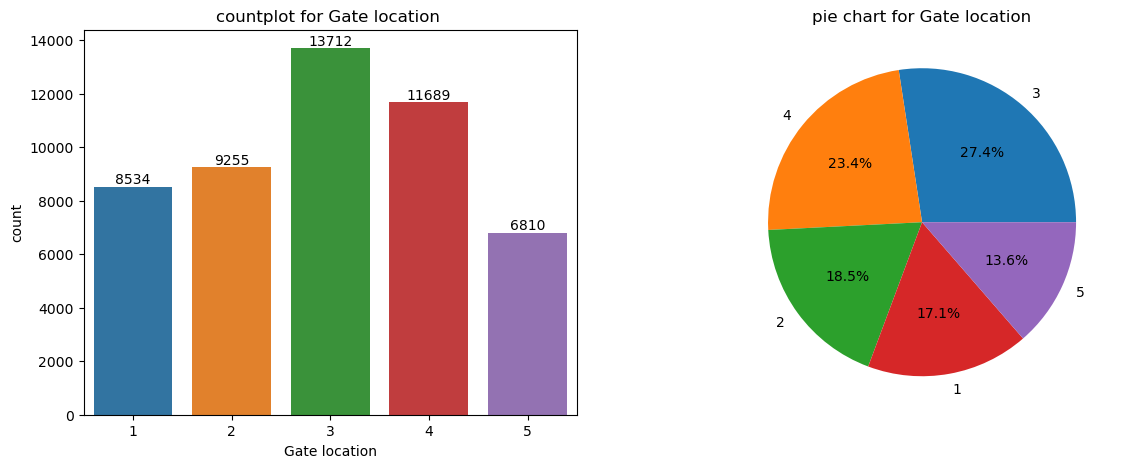

--------------------------------------------------
value_counts for category Food and drink

Food and drink
4    11678
3    10741
5    10731
2    10649
1     6139
0       62
Name: count, dtype: int64
--------------------------------------------------


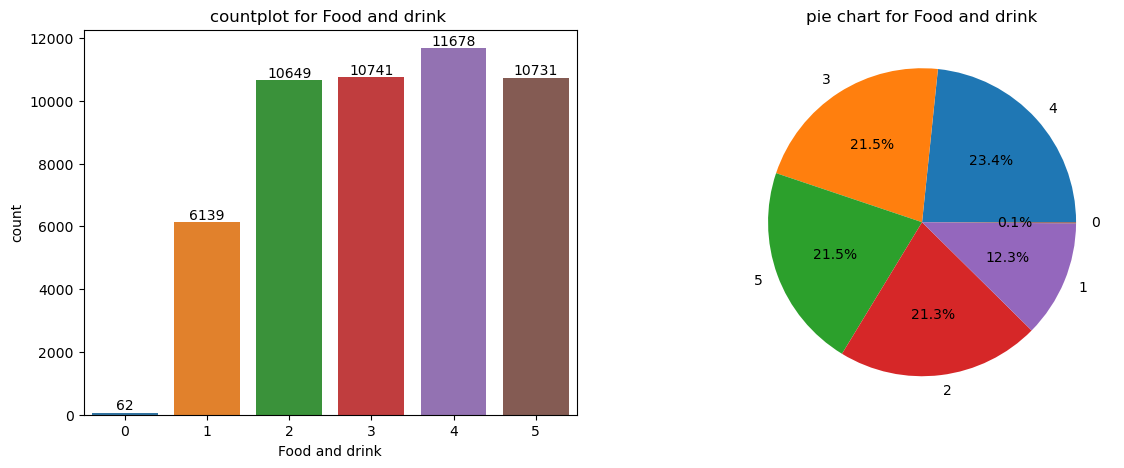

--------------------------------------------------
value_counts for category Online boarding

Online boarding
4    14873
3    10455
5     9997
2     8400
1     5031
0     1244
Name: count, dtype: int64
--------------------------------------------------


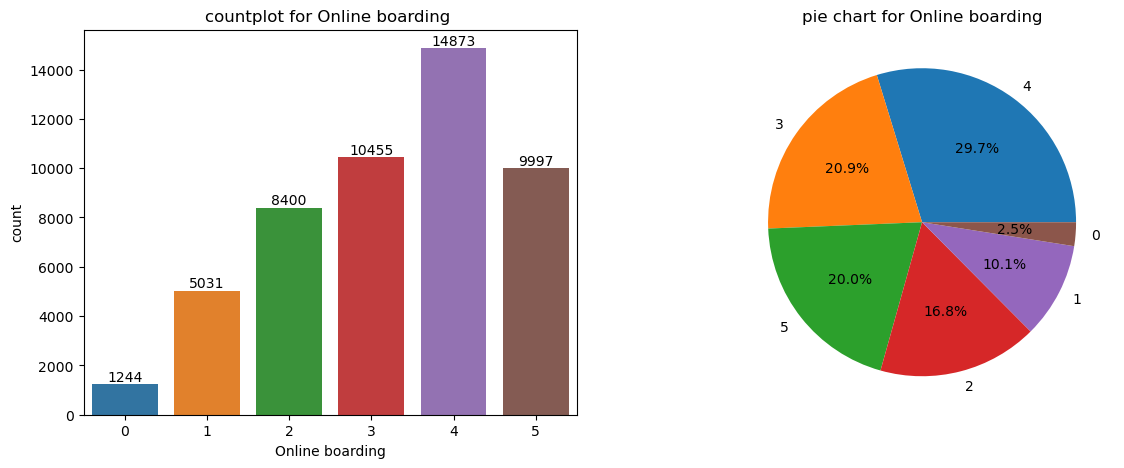

--------------------------------------------------
value_counts for category Seat comfort

Seat comfort
4    15269
5    12765
3     8979
2     7157
1     5829
0        1
Name: count, dtype: int64
--------------------------------------------------


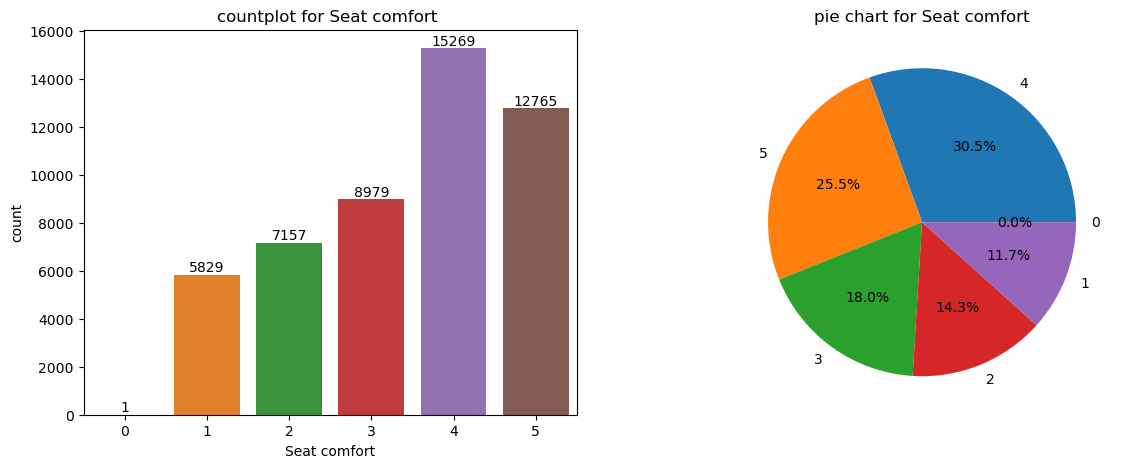

--------------------------------------------------
value_counts for category Inflight entertainment

Inflight entertainment
4    14059
5    12218
3     9223
2     8432
1     6060
0        8
Name: count, dtype: int64
--------------------------------------------------


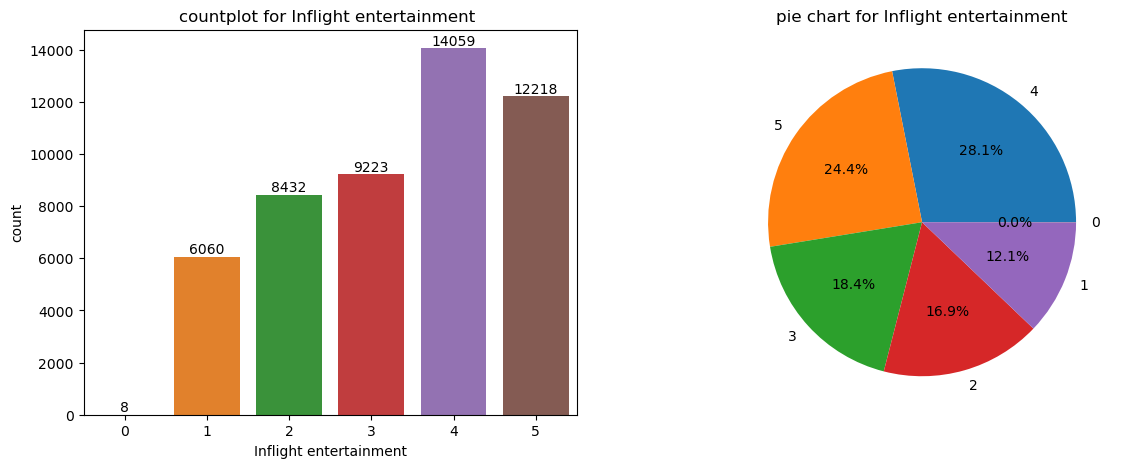

--------------------------------------------------
value_counts for category On-board service

On-board service
4    14860
5    11532
3    11097
2     6958
1     5551
0        2
Name: count, dtype: int64
--------------------------------------------------


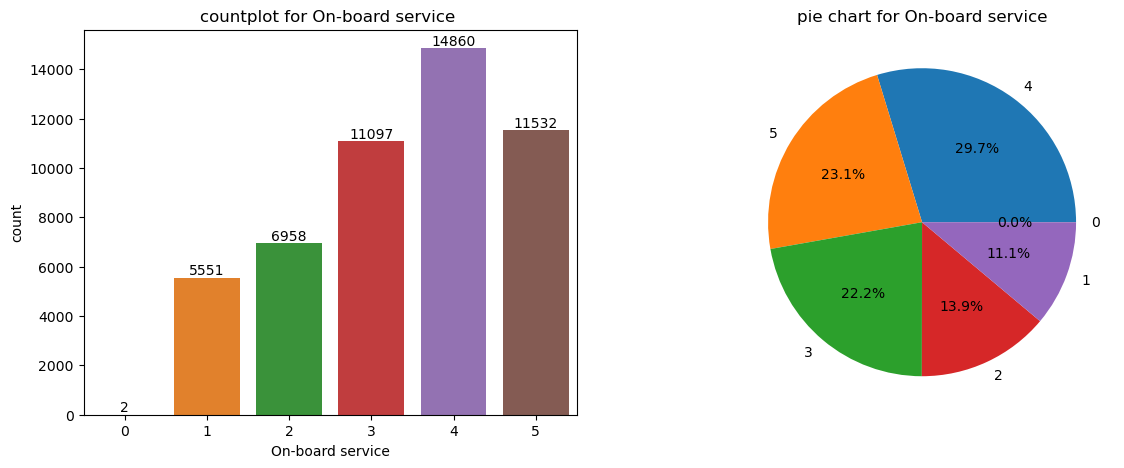

--------------------------------------------------
value_counts for category Leg room service

Leg room service
4    13908
5    12032
3     9601
2     9308
1     4898
0      253
Name: count, dtype: int64
--------------------------------------------------


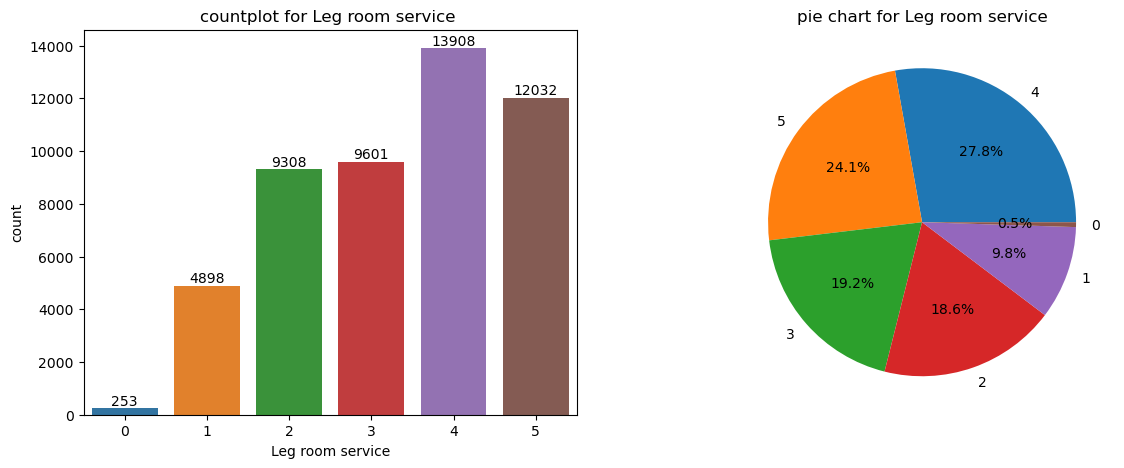

--------------------------------------------------
value_counts for category Baggage handling

Baggage handling
4    18091
5    13179
3     9846
2     5416
1     3468
Name: count, dtype: int64
--------------------------------------------------


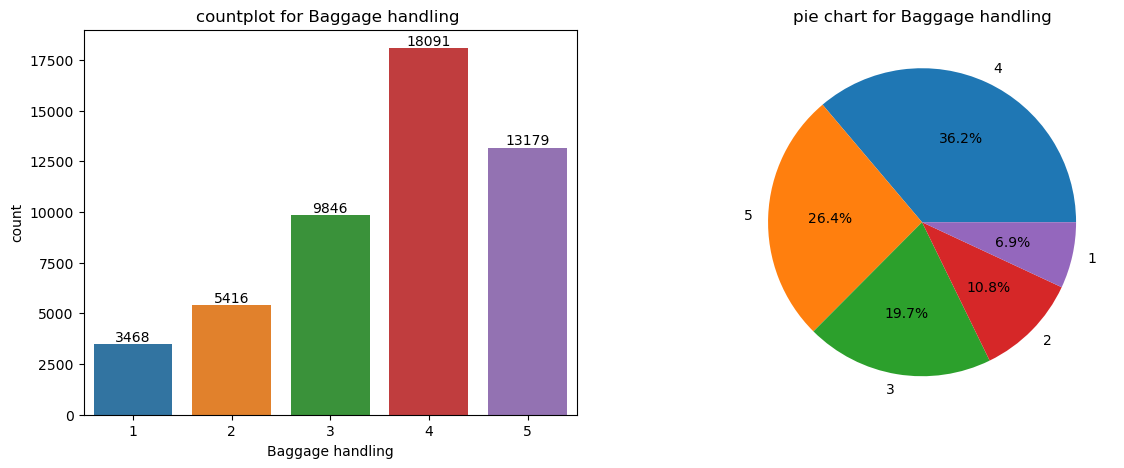

--------------------------------------------------
value_counts for category Checkin service

Checkin service
4    14161
3    13704
5    10020
2     6095
1     6019
0        1
Name: count, dtype: int64
--------------------------------------------------


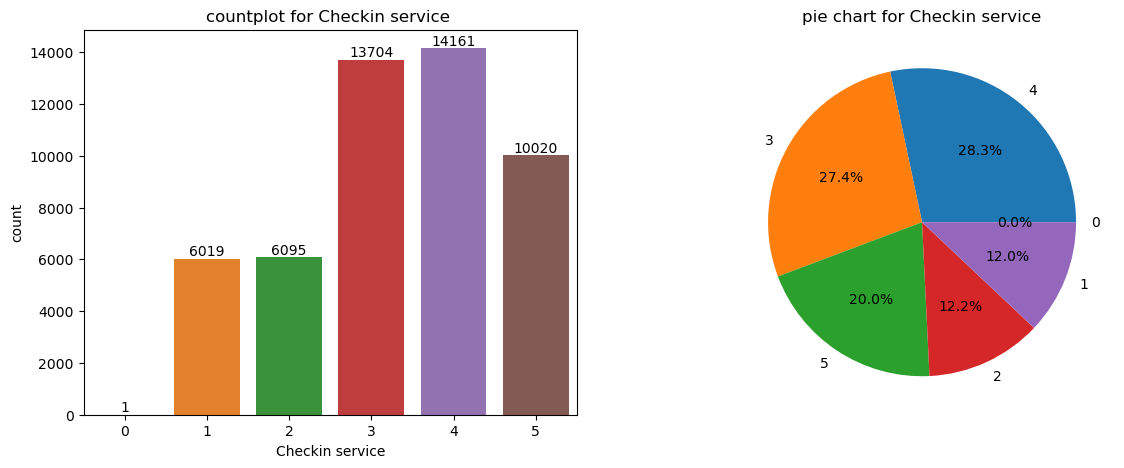

--------------------------------------------------
value_counts for category Inflight service

Inflight service
4    18296
5    13345
3     9682
2     5344
1     3331
0        2
Name: count, dtype: int64
--------------------------------------------------


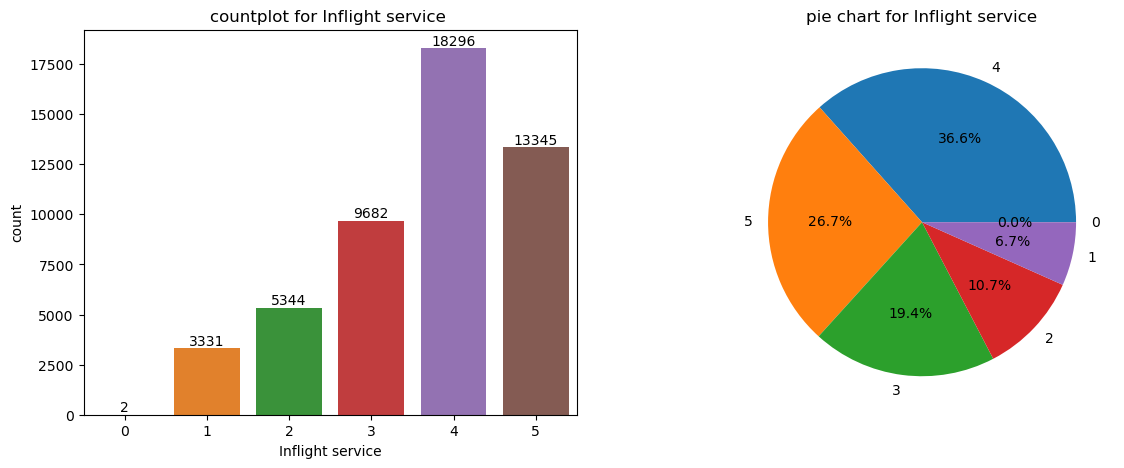

--------------------------------------------------
value_counts for category Cleanliness

Cleanliness
4    12967
3    11896
5    10965
2     7704
1     6461
0        7
Name: count, dtype: int64
--------------------------------------------------


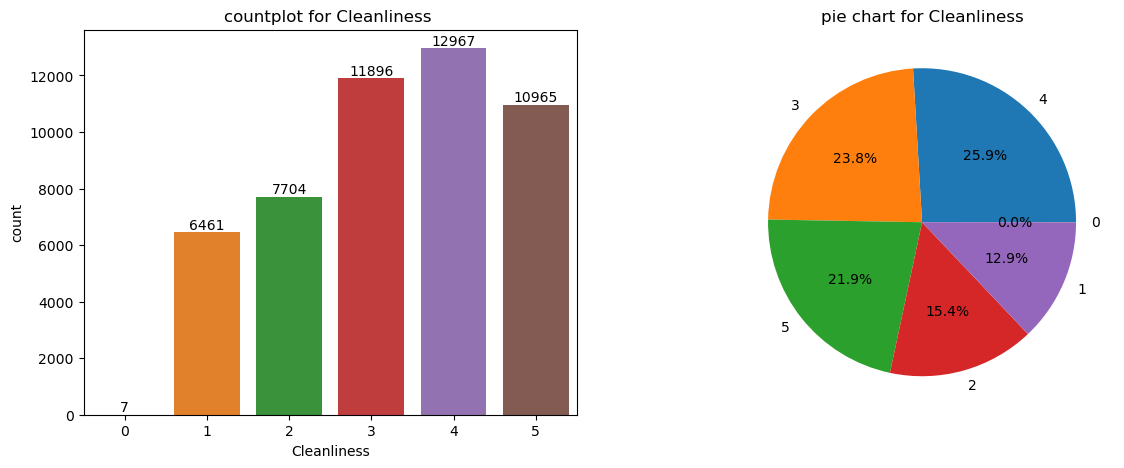

--------------------------------------------------
value_counts for category satisfaction

satisfaction
neutral or dissatisfied    28322
satisfied                  21678
Name: count, dtype: int64
--------------------------------------------------


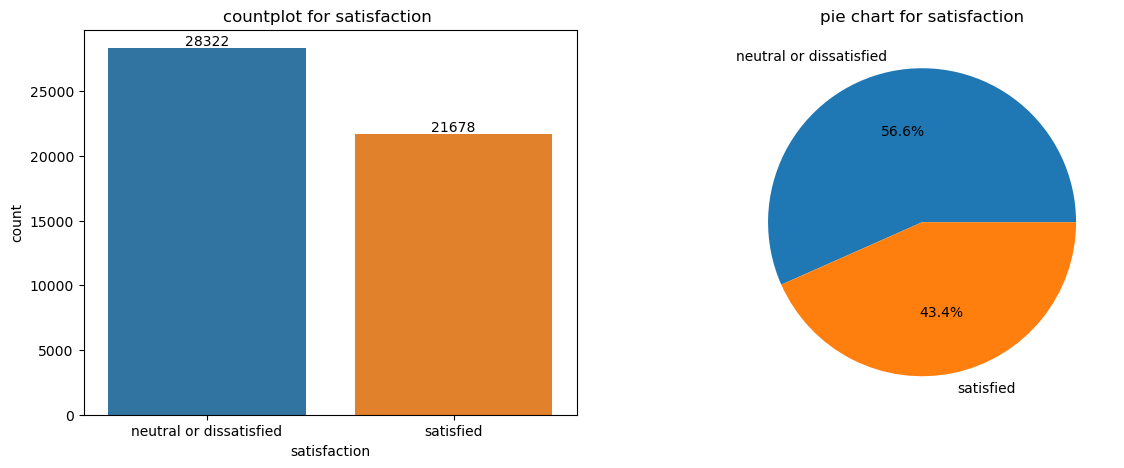

In [16]:
for col in categorical_col:
    plt.figure(figsize=[14, 5])                           #Definning figure size
    plt.subplot(1, 2, 1)                                  #subplot 1
    print("-" * 50)                                       #printing seperator line
    print("value_counts for category {}\n".format(col))
    print(df[col].value_counts())                       #value count for each category
    print("-" * 50)                                       #printing seperator line
    plt.title("countplot for {} ".format(col))            #Giving the title on top
    ax=sns.countplot(data = df, x = col)                  #countplot for categorical columns

    for label in ax.containers:
      ax.bar_label(label)

    plt.subplot(1, 2, 2)                                  #subplot 2
    plt.title("pie chart for {}".format(col))             #Giving the title on top
    mylabel = df[col].value_counts().index                #indexes for piechart
    y=df[col].value_counts().values                       #values for index
    plt.pie(y, labels = mylabel, autopct = "%1.1f%%")     #pie chart for categorical columns

    plt.show();                                           #To remove the array in output  using plt.show();

# Bi-Variate analysis for categorical columns
- Analysis using Countplot with Hue = "satisfaction"


--------------------------------------------------
value_counts for category Gender

Gender
Female    25224
Male      24776
Name: count, dtype: int64


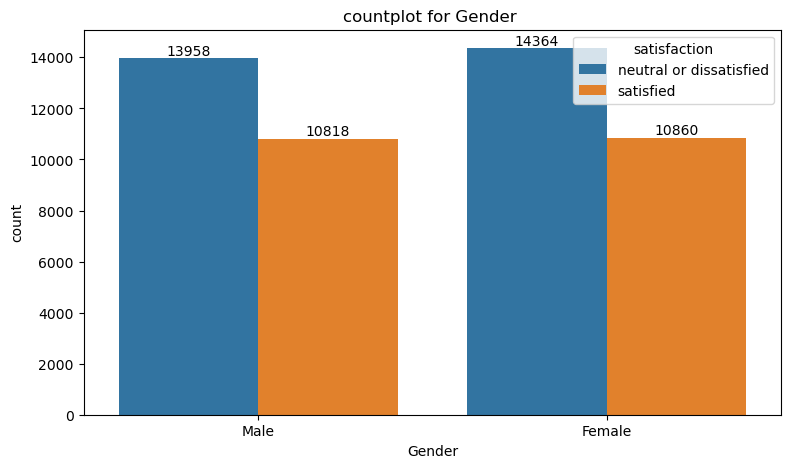

--------------------------------------------------
value_counts for category Customer Type

Customer Type
Loyal Customer       40883
disloyal Customer     9117
Name: count, dtype: int64


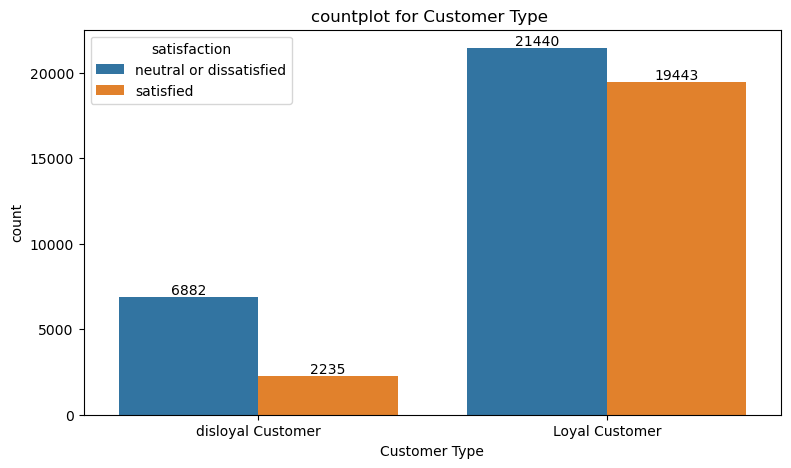

--------------------------------------------------
value_counts for category Type of Travel

Type of Travel
Business travel    34598
Personal Travel    15402
Name: count, dtype: int64


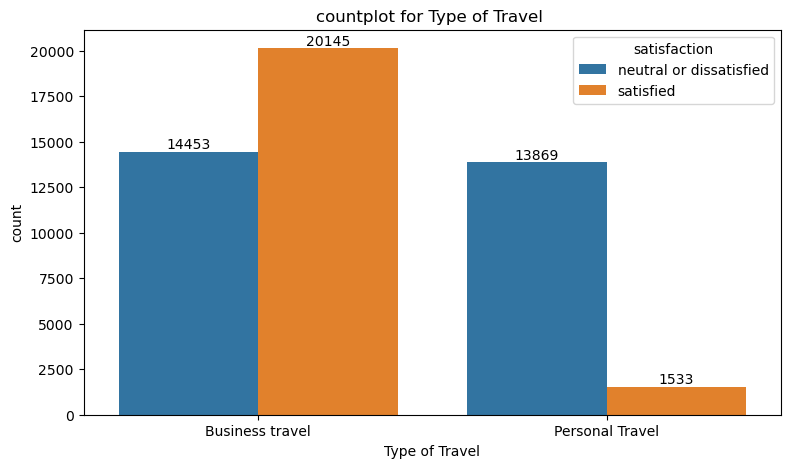

--------------------------------------------------
value_counts for category Class

Class
Business    24513
Eco         21996
Eco Plus     3491
Name: count, dtype: int64


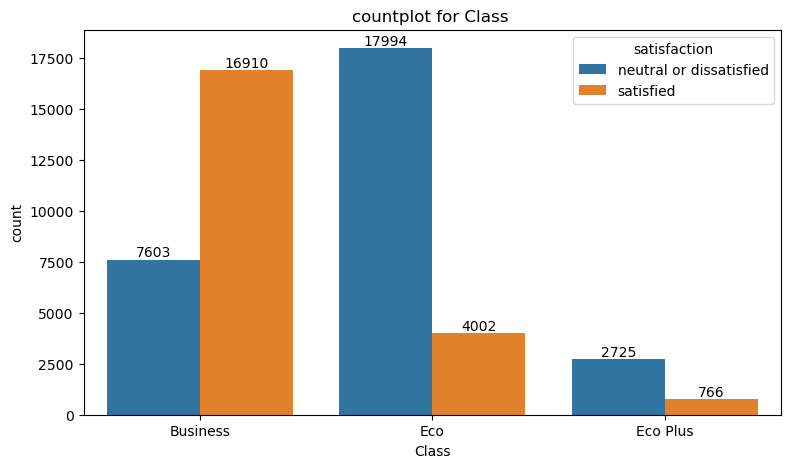

--------------------------------------------------
value_counts for category Inflight wifi service

Inflight wifi service
2    12447
3    12445
4     9466
1     8620
5     5493
0     1529
Name: count, dtype: int64


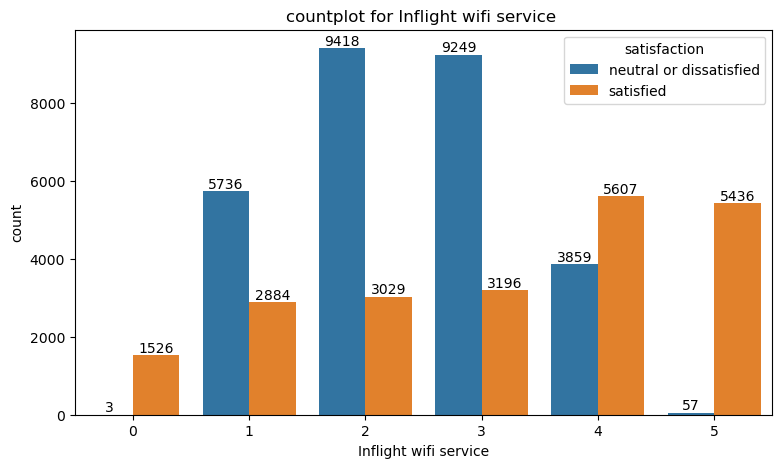

--------------------------------------------------
value_counts for category Departure/Arrival time convenient

Departure/Arrival time convenient
4    12264
5    10800
3     8717
2     8203
1     7433
0     2583
Name: count, dtype: int64


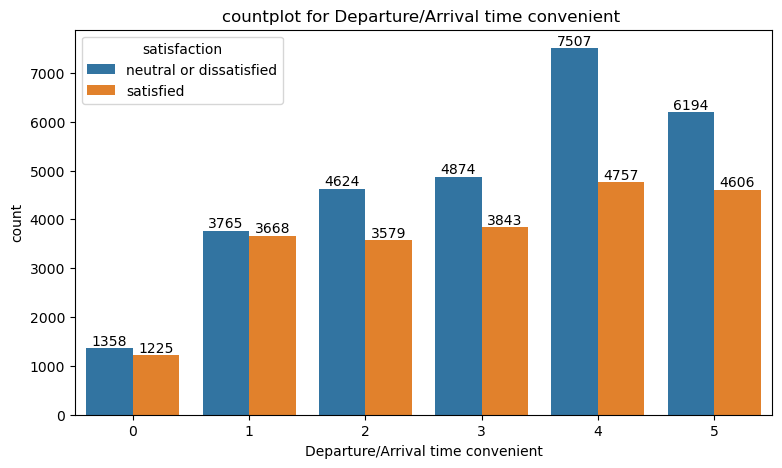

--------------------------------------------------
value_counts for category Ease of Online booking

Ease of Online booking
3    11655
2    11476
4     9410
1     8348
5     6796
0     2315
Name: count, dtype: int64


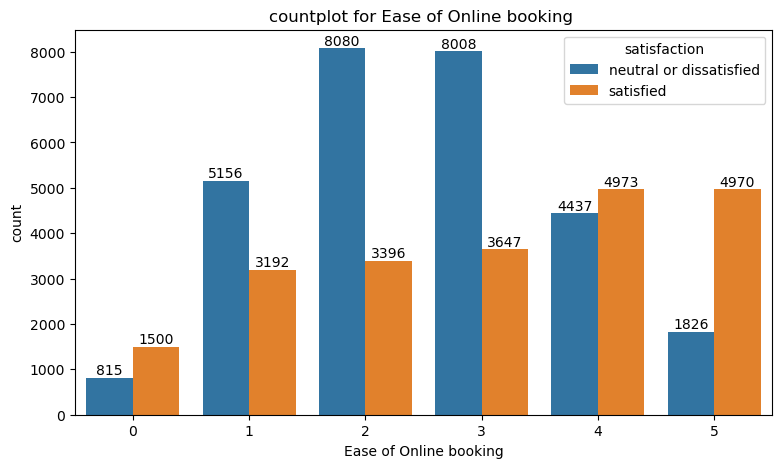

--------------------------------------------------
value_counts for category Gate location

Gate location
3    13712
4    11689
2     9255
1     8534
5     6810
Name: count, dtype: int64


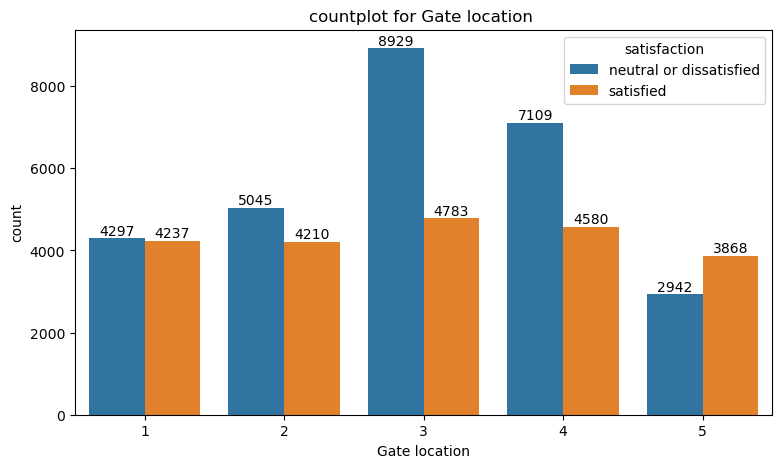

--------------------------------------------------
value_counts for category Food and drink

Food and drink
4    11678
3    10741
5    10731
2    10649
1     6139
0       62
Name: count, dtype: int64


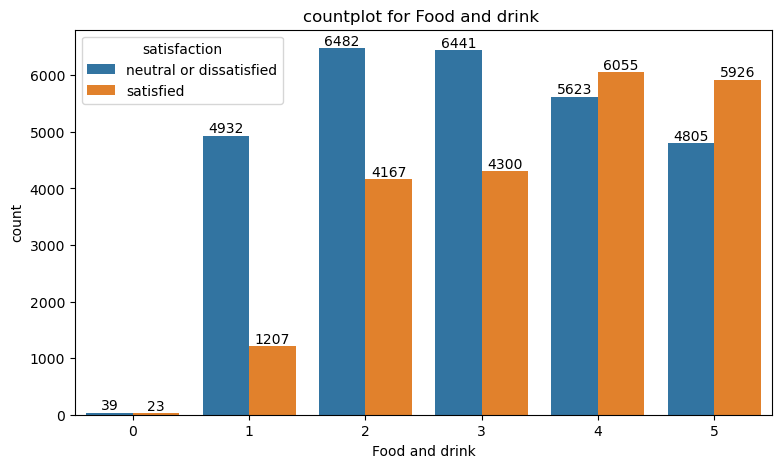

--------------------------------------------------
value_counts for category Online boarding

Online boarding
4    14873
3    10455
5     9997
2     8400
1     5031
0     1244
Name: count, dtype: int64


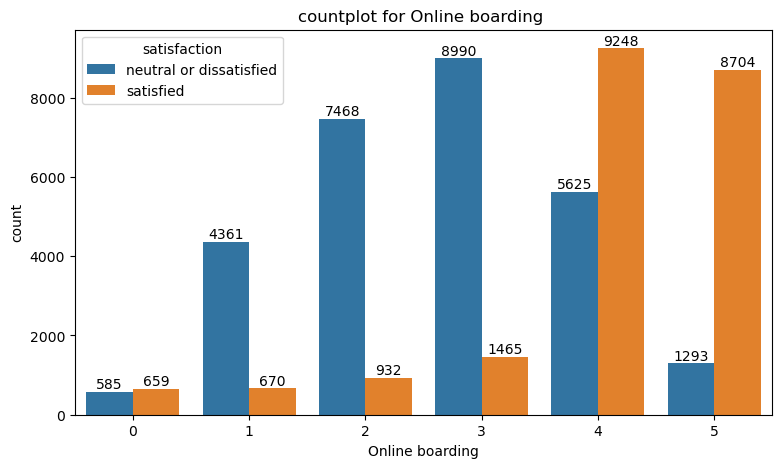

--------------------------------------------------
value_counts for category Seat comfort

Seat comfort
4    15269
5    12765
3     8979
2     7157
1     5829
0        1
Name: count, dtype: int64


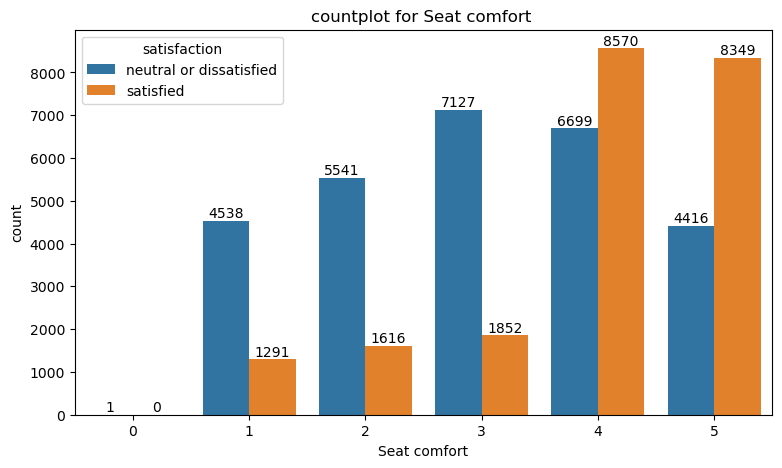

--------------------------------------------------
value_counts for category Inflight entertainment

Inflight entertainment
4    14059
5    12218
3     9223
2     8432
1     6060
0        8
Name: count, dtype: int64


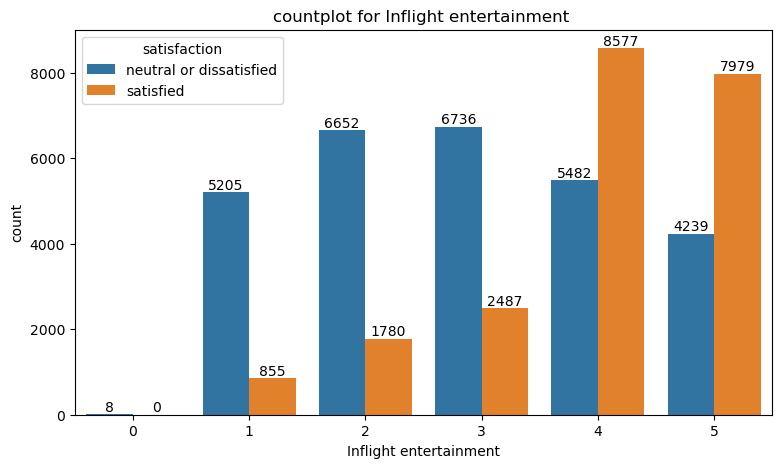

--------------------------------------------------
value_counts for category On-board service

On-board service
4    14860
5    11532
3    11097
2     6958
1     5551
0        2
Name: count, dtype: int64


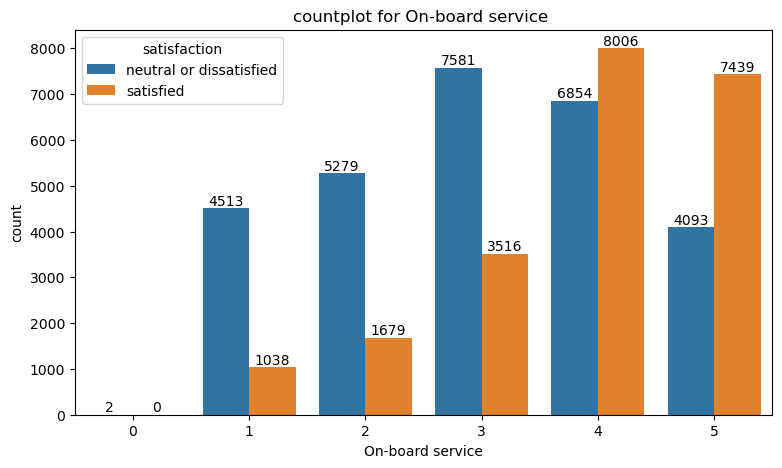

--------------------------------------------------
value_counts for category Leg room service

Leg room service
4    13908
5    12032
3     9601
2     9308
1     4898
0      253
Name: count, dtype: int64


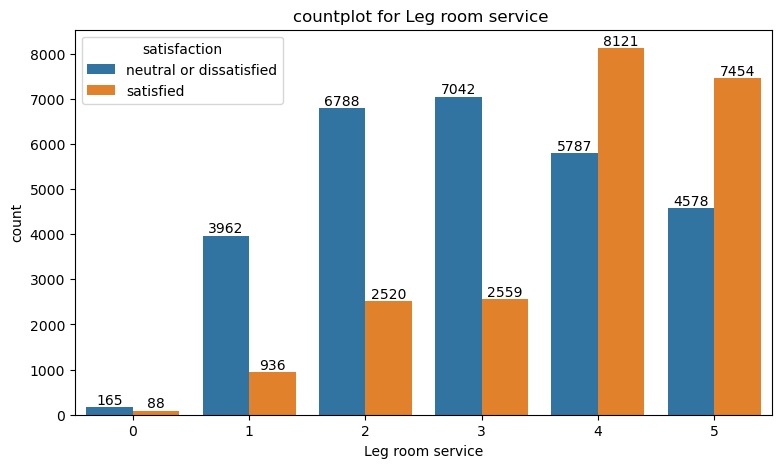

--------------------------------------------------
value_counts for category Baggage handling

Baggage handling
4    18091
5    13179
3     9846
2     5416
1     3468
Name: count, dtype: int64


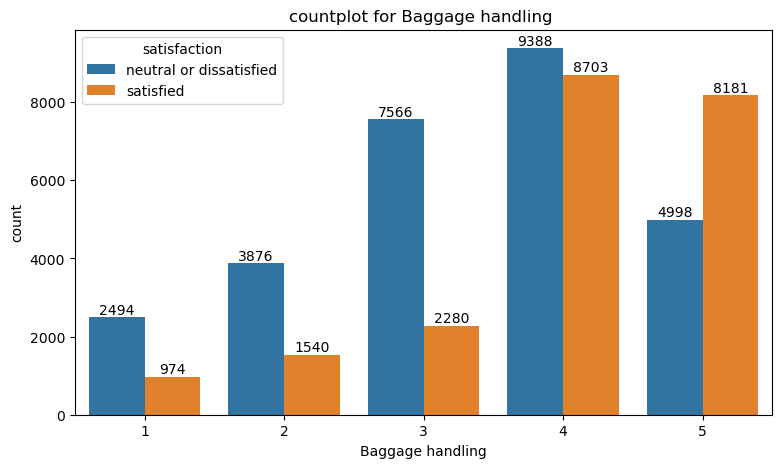

--------------------------------------------------
value_counts for category Checkin service

Checkin service
4    14161
3    13704
5    10020
2     6095
1     6019
0        1
Name: count, dtype: int64


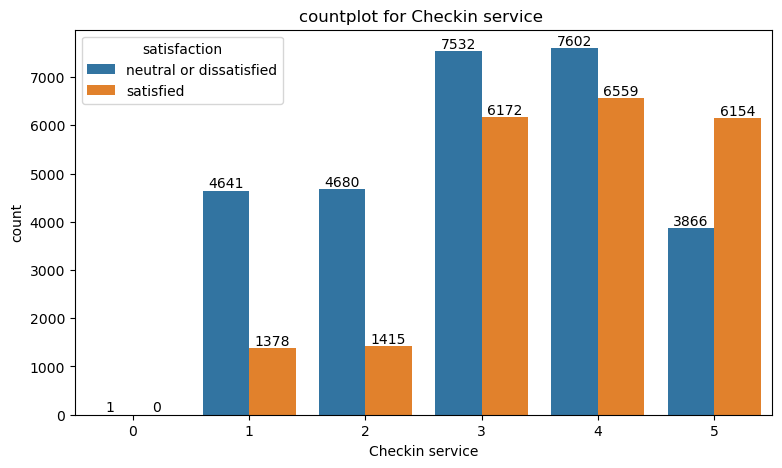

--------------------------------------------------
value_counts for category Inflight service

Inflight service
4    18296
5    13345
3     9682
2     5344
1     3331
0        2
Name: count, dtype: int64


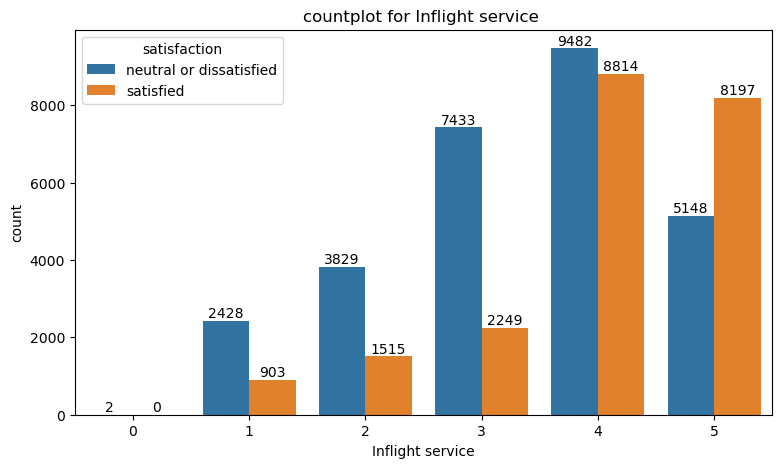

--------------------------------------------------
value_counts for category Cleanliness

Cleanliness
4    12967
3    11896
5    10965
2     7704
1     6461
0        7
Name: count, dtype: int64


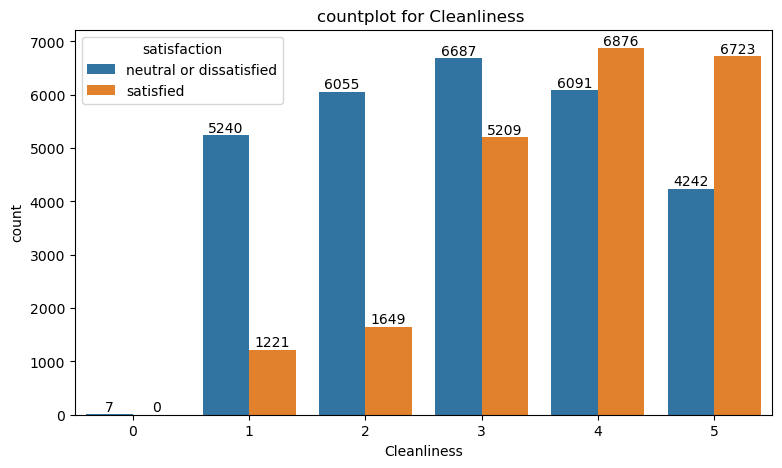

--------------------------------------------------
value_counts for category satisfaction

satisfaction
neutral or dissatisfied    28322
satisfied                  21678
Name: count, dtype: int64


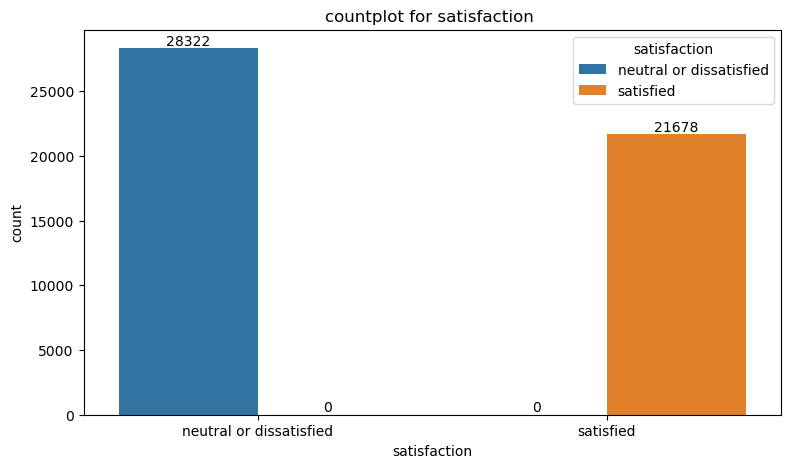

In [17]:
for col in categorical_col:
    plt.figure(figsize=[9, 5])                                  # Definning figure size
    print("-" * 50)                                             #printing seperator line
    print("value_counts for category {}\n".format(col))
    print(df[col].value_counts())                               #value count for each category
    plt.title("countplot for {} ".format(col))                  #Giving the title on top
    ax=sns.countplot(data = df, x = col, hue = "satisfaction")  #countplot for categorical columns
    for label in ax.containers:                                 #adding labels in bars
     ax.bar_label(label)
    plt.show();                                                 #To remove the array in output  using plt.show();

# **Uni Variate Analysis for Continuous Columns**
- *Using Histogram and Boxplot*

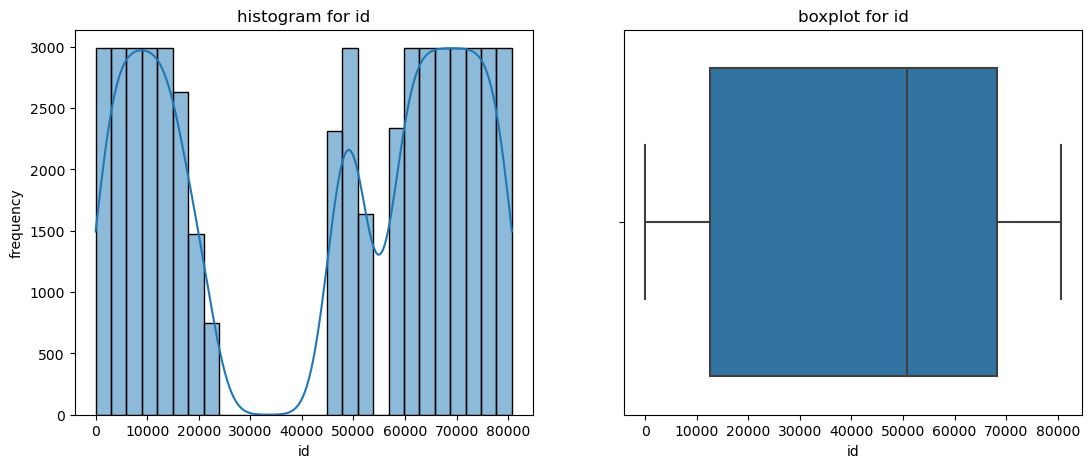

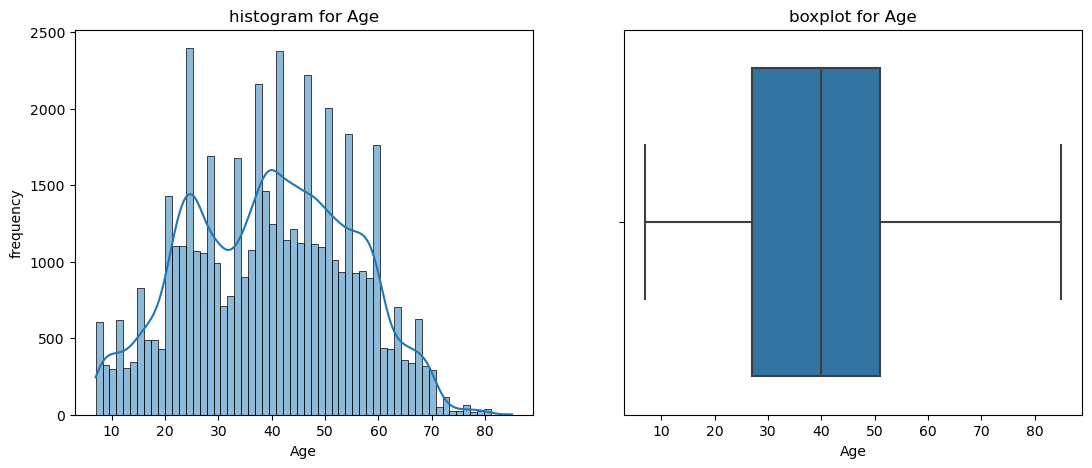

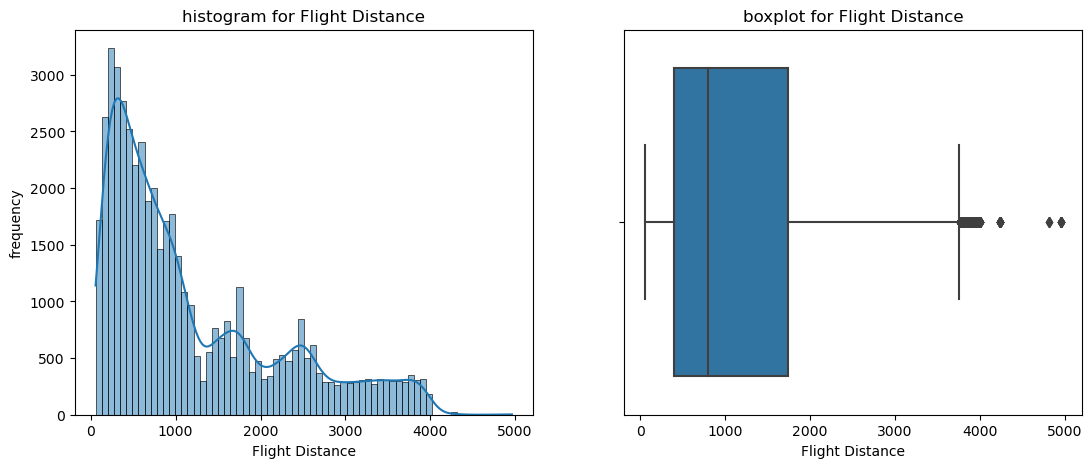

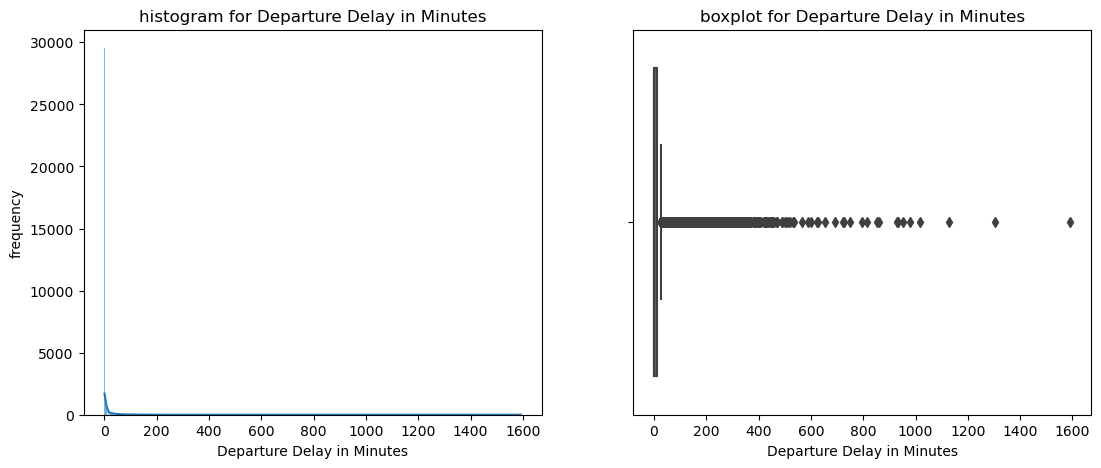

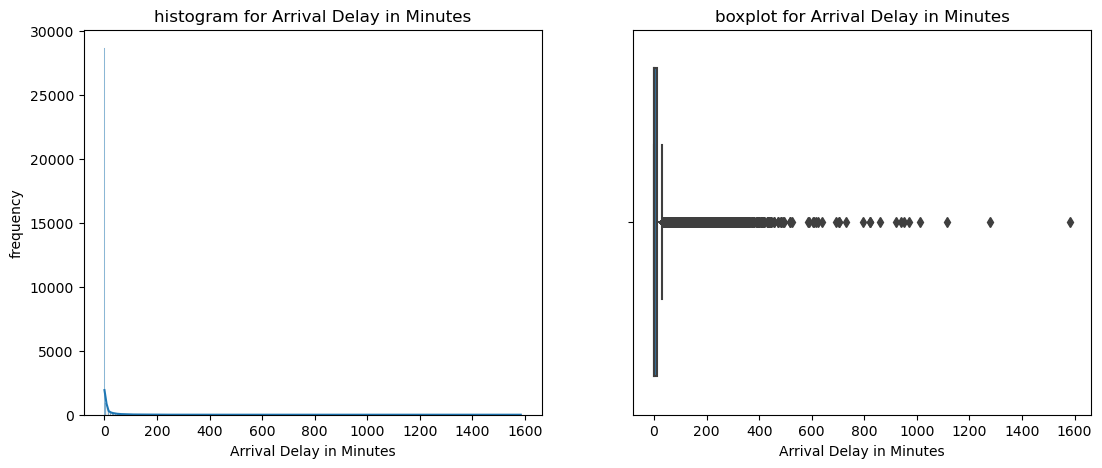

In [18]:
for col in continuous_col:
    plt.figure(figsize=[13, 5])                    #defining figure size
    plt.subplot(1, 2, 1)                            #subplot 1 for histplot
    plt.title("histogram for {}".format(col))     #giving title to histograms
    plt.ylabel("frequency".format(col))
    plt.xlabel(col)                               #giving name to x axis
    sns.histplot(df, x = df[col], kde = True)       #Histogram distribution for continuous columns
    plt.subplot(1, 2, 2)                            #subplot 2 for histplot
    plt.title("boxplot for {}".format(col))       #giving title to boxplot
    plt.xlabel(col)
    sns.boxplot(df, x = df[col])                 #Histogram distribution for continuous columns

    plt.show();                                   #To remove the array in output  using plt.show();

# **Correlation**

In [19]:
df.corr(numeric_only = True)

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,1.000000,-0.008693,0.174666,0.006119,-0.000167,0.018668,-0.000645,0.009783,0.022417,0.022435,0.002797,0.026891,0.020973,0.026491,0.039971,0.036941,0.013941,-0.046657,-0.061921
Age,-0.008693,1.000000,0.107022,0.018643,0.035568,0.028519,0.004048,0.025803,0.215416,0.163379,0.077867,0.055552,0.036765,-0.052254,0.029916,-0.056764,0.055811,-0.018958,-0.019261
Flight Distance,0.174666,0.107022,1.000000,-0.003232,-0.023892,0.064040,0.003391,0.060125,0.221510,0.161628,0.136245,0.120641,0.142241,0.075236,0.083345,0.070887,0.094740,-0.006117,-0.011437
Inflight wifi service,0.006119,0.018643,-0.003232,1.000000,0.340627,0.715936,0.345794,0.125596,0.447334,0.117407,0.203683,0.124338,0.163955,0.127183,0.043737,0.118965,0.124912,-0.018795,-0.020601
Departure/Arrival time convenient,-0.000167,0.035568,-0.023892,0.340627,1.000000,0.426655,0.451719,0.005621,0.069245,0.015027,-0.006656,0.064473,0.009714,0.068471,0.093763,0.068722,0.015483,0.001887,0.000285
Ease of Online booking,0.018668,0.028519,0.064040,0.715936,0.426655,1.000000,0.461283,0.033123,0.403076,0.028897,0.047145,0.041237,0.116799,0.040991,0.008379,0.035904,0.015844,-0.007036,-0.007566
Gate location,-0.000645,0.004048,0.003391,0.345794,0.451719,0.461283,1.000000,-0.000653,0.005558,0.003729,0.003295,-0.028585,-0.002697,-0.002130,-0.031452,0.000528,-0.003250,0.008733,0.008145
Food and drink,0.009783,0.025803,0.060125,0.125596,0.005621,0.033123,-0.000653,1.000000,0.233921,0.578058,0.620686,0.063658,0.033936,0.041672,0.093846,0.042721,0.657044,-0.036048,-0.038988
Online boarding,0.022417,0.215416,0.221510,0.447334,0.069245,0.403076,0.005558,0.233921,1.000000,0.423134,0.284340,0.157645,0.130738,0.087305,0.206373,0.080304,0.329716,-0.025972,-0.026768
Seat comfort,0.022435,0.163379,0.161628,0.117407,0.015027,0.028897,0.003729,0.578058,0.423134,1.000000,0.613458,0.134850,0.102426,0.081618,0.197684,0.074939,0.682278,-0.033923,-0.035634


<Axes: >

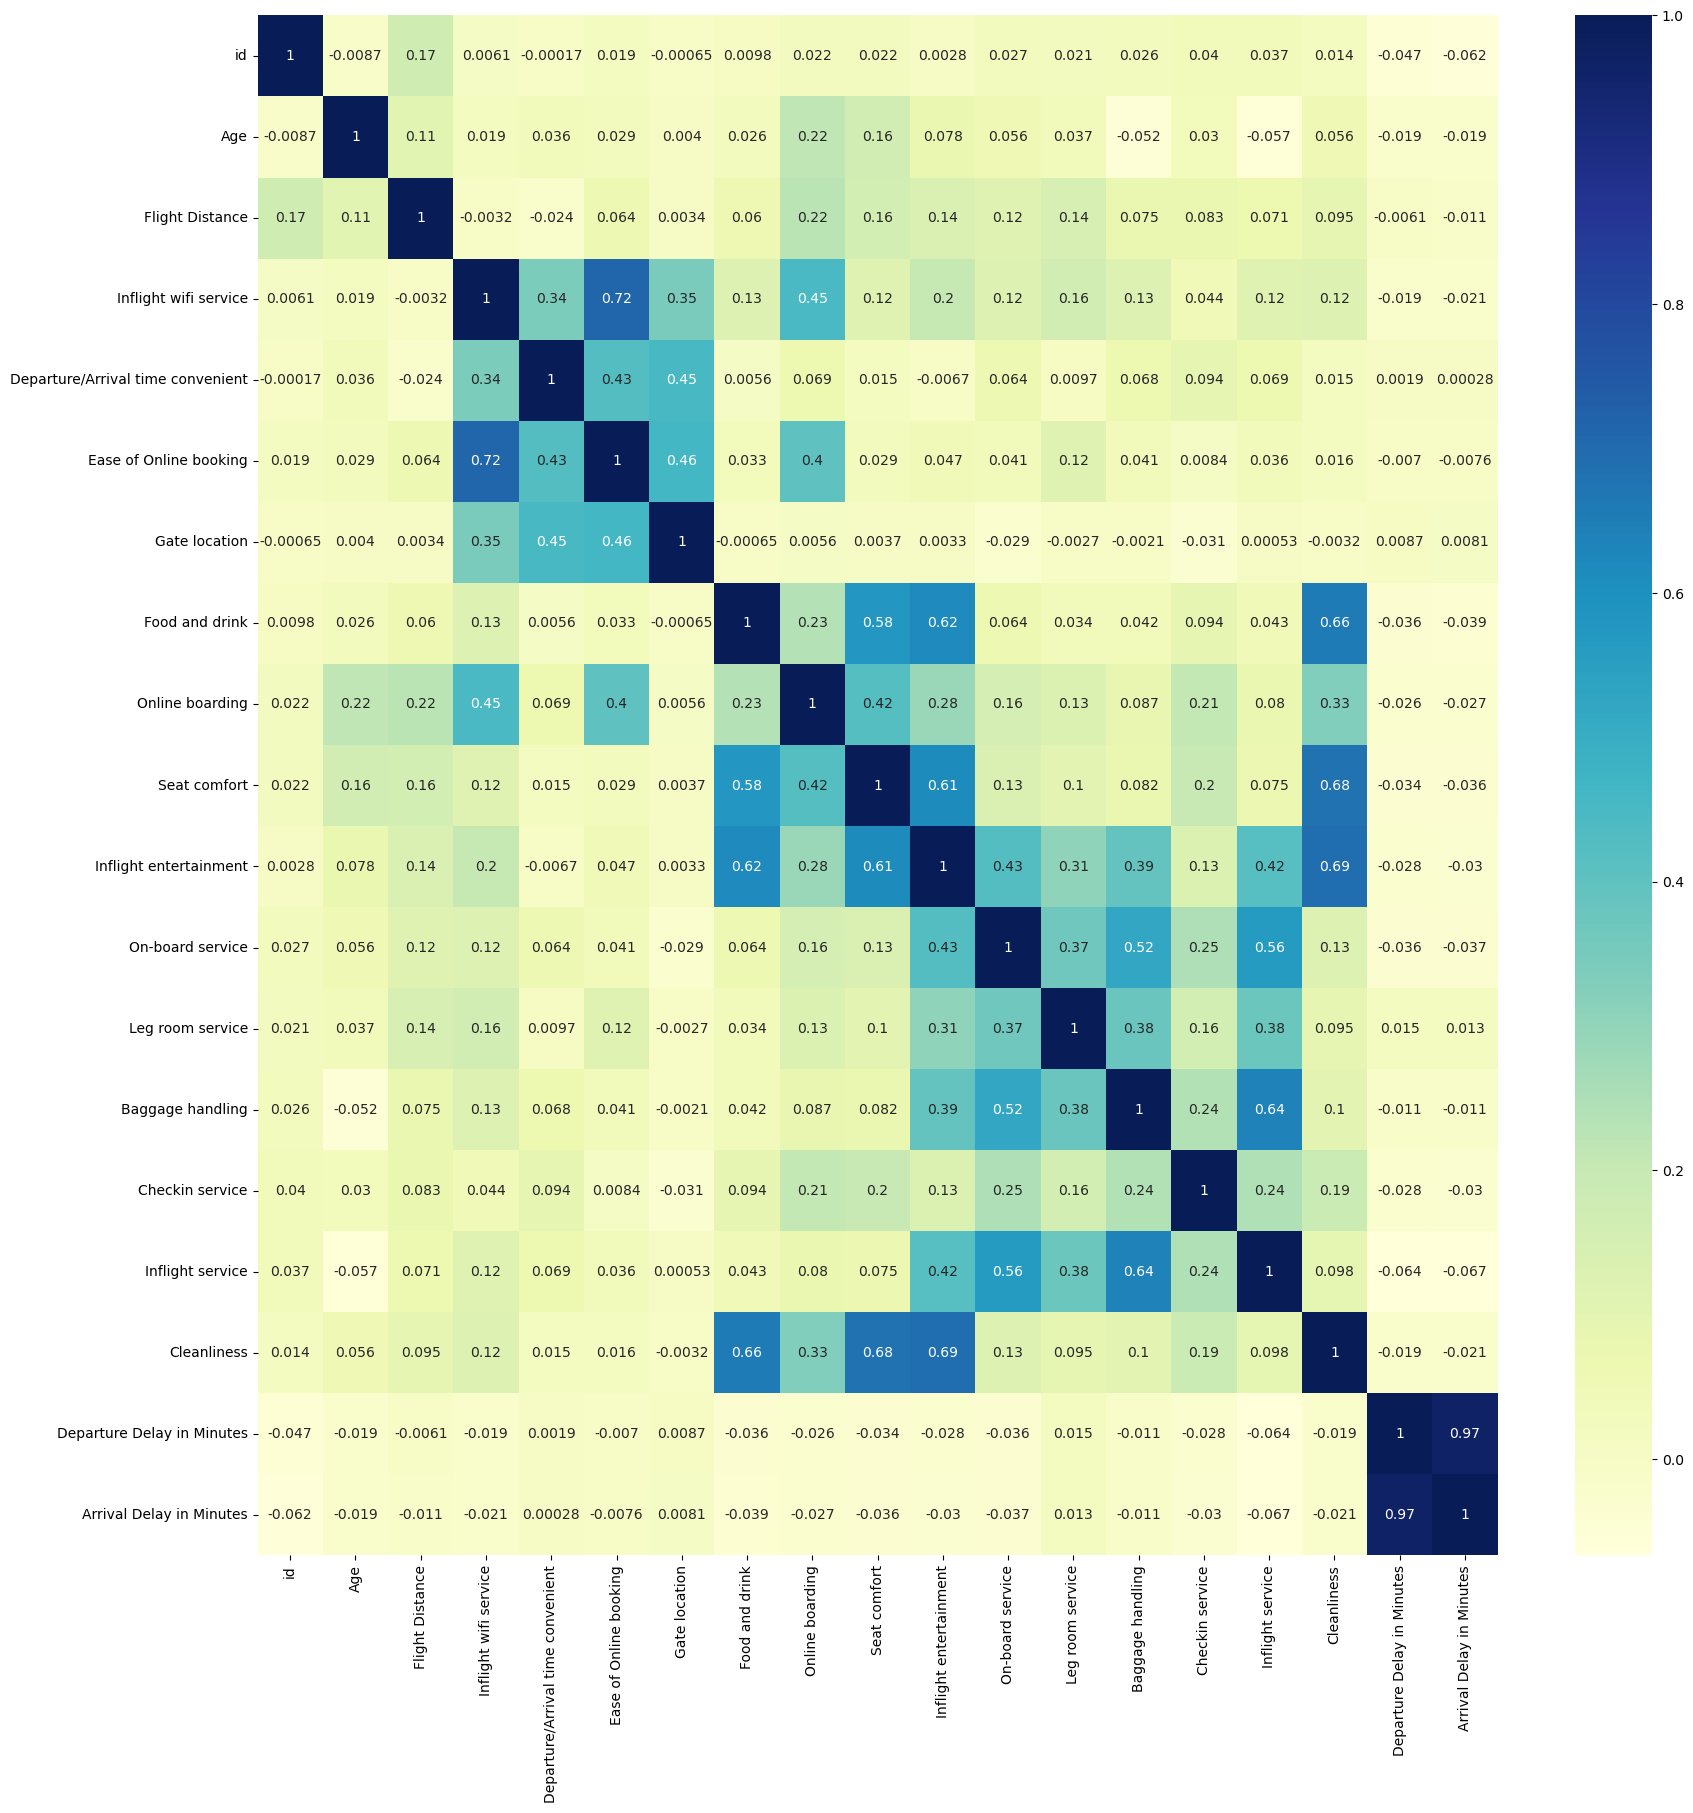

In [20]:
plt.figure(figsize=[20, 20])                                               #defining figure size
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = "YlGnBu")   #heatmap to show correlation between features

## **Feature Encoding**
- Encoding of Features Using Label Encoder

In [21]:
from sklearn.preprocessing import LabelEncoder  #imporing labelencoder from sklearn
encoder = LabelEncoder()  #assigning labelencoder to encoder

In [22]:
for col in df.columns:
    if df[col].dtypes == "object":
        df[col] = encoder.fit_transform(df[col])

In [23]:
#checking if encoding done
df.head(10)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1,1,48,0,0,821,3,3,3,...,5,3,2,5,4,5,5,2,5.0,0
1,2,0,0,35,0,0,821,2,2,2,...,5,5,5,5,3,5,5,26,39.0,1
2,3,1,0,41,0,0,853,4,4,4,...,3,3,3,3,4,3,5,0,0.0,1
3,4,1,0,50,0,0,1905,2,2,2,...,5,5,5,5,3,5,4,0,0.0,1
4,5,0,0,49,0,0,3470,3,3,3,...,3,3,4,3,3,3,5,0,1.0,1
5,6,1,0,43,0,0,3788,4,4,4,...,4,4,4,4,3,4,3,0,0.0,1
6,7,1,0,43,0,0,1963,3,3,3,...,5,5,5,5,4,5,4,0,0.0,1
7,8,0,0,60,0,0,853,4,3,4,...,3,3,4,3,3,3,4,0,3.0,1
8,9,1,0,50,0,0,2607,4,1,1,...,4,4,4,4,3,4,3,0,0.0,0
9,10,0,0,38,0,0,2822,2,2,5,...,5,5,5,5,3,5,4,13,0.0,1


## **Preparing Training and Testing Data**

In [24]:
#importing train test split from sklearn.model_selection
from sklearn.model_selection import train_test_split
x = df.drop(["satisfaction"], axis=1)                                                           #input data to model except result "satisfaction"
y = df["satisfaction"]                                                                         #satisfaction is prediction
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 7 )   #defining training and test data, test size=0.2 means test data will be 20%.

In [25]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.20, random_state = 7)   #defining training and val data, test size=0.2 means test data will be 20%.

# Scaling of data

In [26]:
#importing standard scaler to scale features
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [27]:
x_train = scale.fit_transform(x_train)    #scaling training data by standard scaler
x_test = scale.transform(x_test)          #transforming scale into test data
x_val = scale.transform(x_val)            #transforming scale into test data

In [28]:
#loading training data to check if it scaled or not
x_train.shape, x_val.shape, x_test.shape, y_train.shape, y_val.shape, y_test.shape

((32000, 23), (8000, 23), (10000, 23), (32000,), (8000,), (10000,))

# Logistic Regression

In [29]:
#importing confusion_matrix,classificatio_report and accuracy_report from metrics to check model performance
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#importing logistic regression to create a model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [30]:
#Giving training to model by training data
model.fit(x_train, y_train)

LogisticRegression()

In [31]:
#predicting results on test data
y_pred_train = model.predict(x_train)
y_pred_val = model.predict(x_val)
y_pred_test = model.predict(x_test)

In [32]:
acc_scr_train = accuracy_score(y_train, y_pred_train)*100              #to get accuracty_score
acc_scr_val = accuracy_score(y_val, y_pred_val) * 100                  #to get accuracty_score
acc_scr_test = accuracy_score(y_test, y_pred_test) * 100               #to get accuracty_score

In [33]:
print(f"accuracy score for train data is : {acc_scr_train} %")

print(f"accuracy score for val data is : {acc_scr_val} %")

print(f"accuracy score for test data is : {acc_scr_test} %")

accuracy score for train data is : 87.43125 %
accuracy score for val data is : 87.775 %
accuracy score for test data is : 87.85 %


In [34]:
class_report_test = classification_report(y_test, y_pred_test)         #to get classification reprt
print(class_report_test)

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      5601
           1       0.88      0.84      0.86      4399

    accuracy                           0.88     10000
   macro avg       0.88      0.87      0.88     10000
weighted avg       0.88      0.88      0.88     10000



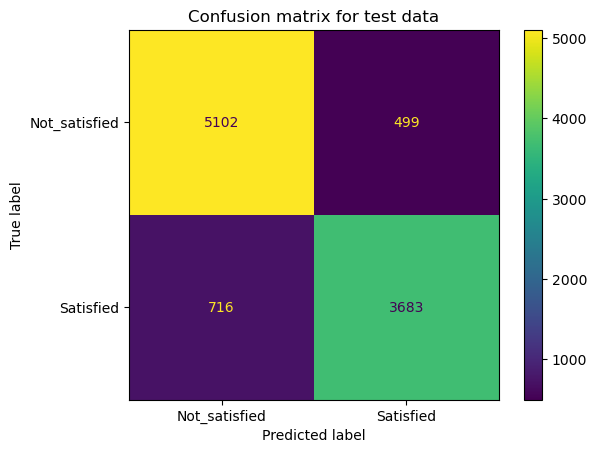

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
class_names = ["Not_satisfied","Satisfied"]
#confusion matrics
con_matrix_test = confusion_matrix(y_test, y_pred_test)                #to get confusion_,atrix
#confusion matrix for test data
con_matrix_test = confusion_matrix(y_test, y_pred_test)                #to get confusion_,atrix
conf_test_disp = ConfusionMatrixDisplay(confusion_matrix = con_matrix_test, display_labels = class_names)
conf_test_disp.plot()
plt.title("Confusion matrix for test data")

plt.show();


#### - Observation : There is no much difference in train ,validation and test accuracy.

# KNN classifier

In [36]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

In [37]:
#training to model
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [38]:
knn_pred_train = knn_model.predict(x_train)
knn_pred_val = knn_model.predict(x_val)
knn_pred_test = knn_model.predict(x_test)

In [39]:
acc_scr_knn_train = accuracy_score(y_train, knn_pred_train) * 100 
acc_scr_knn_val = accuracy_score(knn_pred_val, y_val) * 100 
acc_scr_knn_test = accuracy_score(knn_pred_test, y_test) * 100 

In [40]:
print(f"accuracy_score of train data is : {acc_scr_knn_train} %")
print(f"accuracy_score of val data is : {acc_scr_knn_val} %")
print(f"accuracy_score for test data is : {acc_scr_knn_test} %")

accuracy_score of train data is : 94.403125 %
accuracy_score of val data is : 92.375 %
accuracy_score for test data is : 92.03 %


In [41]:
class_report_knn_test = classification_report(y_test, knn_pred_test)   #to get classification reprt
print(class_report_knn_test)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      5601
           1       0.95      0.87      0.91      4399

    accuracy                           0.92     10000
   macro avg       0.92      0.91      0.92     10000
weighted avg       0.92      0.92      0.92     10000



Text(0.5, 1.0, 'Confusion matrix for test data')

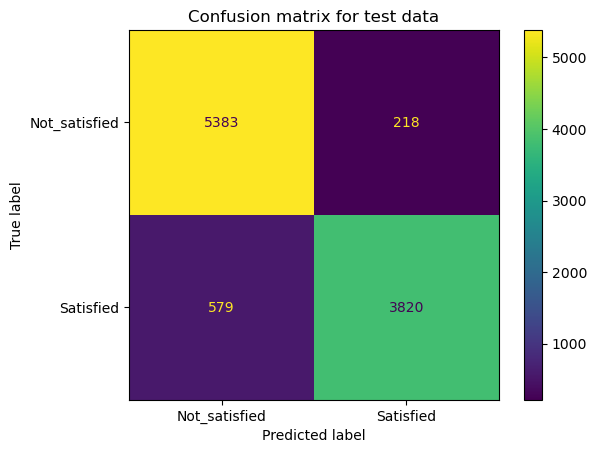

In [42]:
#confusion matrix
con_matrix_knn_test=confusion_matrix(y_test, knn_pred_test)      #to get confusion_matrix
#confusion matrix for train data
conf_knn_test_disp = ConfusionMatrixDisplay(confusion_matrix = con_matrix_knn_test, display_labels = class_names)
conf_knn_test_disp.plot()
plt.title("Confusion matrix for test data")

# SVM classifier

In [43]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(x_train, y_train)     #training to model

SVC()

In [44]:
svc_train_pred = svc_model.predict(x_train) #prediction on train data
svc_val_pred = svc_model.predict(x_val)     #prediction on val data
svc_test_pred = svc_model.predict(x_test)   #prediction on test data

In [45]:
acc_scr_svc_train = accuracy_score(y_train, svc_train_pred) * 100   #accuracy score for train data
acc_scr_svc_val = accuracy_score(svc_val_pred, y_val) * 100         #accuracy score for val data
acc_scr_svc_test = accuracy_score(svc_test_pred, y_test) * 100      #accuracy score for test data

In [46]:
print(f"accuracy score for train data is {acc_scr_svc_train} %")

print(f"accuracy score for val data is {acc_scr_svc_val} %")

print(f"accuracy score for test data is {acc_scr_svc_test} %")

accuracy score for train data is 95.721875 %
accuracy score for val data is 95.25 %
accuracy score for test data is 94.89 %


In [47]:
#classification report
class_report_svc_test=classification_report(y_test,svc_test_pred)   #to get classification reprt
print(class_report_svc_test)

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      5601
           1       0.96      0.93      0.94      4399

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



Text(0.5, 1.0, 'Confusion matrix for test data')

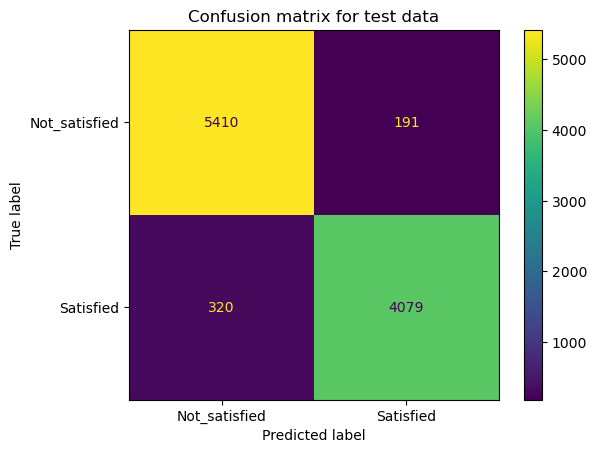

In [48]:
#confusion matrix
con_matrix_svc_test = confusion_matrix(y_test, svc_test_pred)  #to get confusion_matrix
#confusion matrix for train data
conf_svc_test_disp = ConfusionMatrixDisplay(confusion_matrix = con_matrix_svc_test, display_labels = class_names)
conf_svc_test_disp.plot()
plt.title("Confusion matrix for test data")

# Random forest classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)  #model training

RandomForestClassifier()

In [50]:
rf_train_pred = rf_model.predict(x_train)
rf_val_pred = rf_model.predict(x_val)
rf_test_pred = rf_model.predict(x_test)

In [51]:
acc_scr_rf_train = accuracy_score(y_train, rf_train_pred)  #accuracy score for train data
acc_scr_rf_val = accuracy_score(rf_val_pred, y_val)        #accuracy score for val data
acc_scr_rf_test = accuracy_score(rf_test_pred, y_test)     #accuracy score for test data

In [52]:
print(f"accuracy score for train data is {acc_scr_rf_train} %")

print(f"accuracy score for val data is {acc_scr_rf_val } %")

print(f"accuracy score for test data is {acc_scr_rf_test} %")

accuracy score for train data is 1.0 %
accuracy score for val data is 0.963375 %
accuracy score for test data is 0.9578 %


In [53]:
#classification report
class_report_rf_test = classification_report(y_test, rf_test_pred)   #to get classification reprt
print(class_report_rf_test)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      5601
           1       0.97      0.93      0.95      4399

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



Text(0.5, 1.0, 'Confusion matrix for test data')

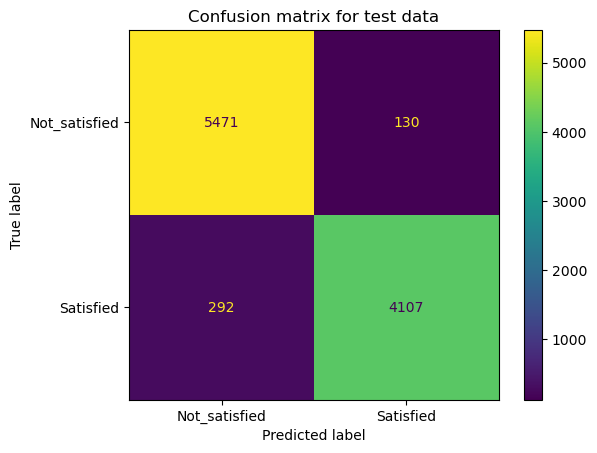

In [54]:
#confusion matrix
con_matrix_rf_test=confusion_matrix(y_test, rf_test_pred)      #to get confusion_matrix
#confusion matrix for train data
conf_rf_test_disp = ConfusionMatrixDisplay(confusion_matrix = con_matrix_rf_test, display_labels = class_names)
conf_rf_test_disp.plot()
plt.title("Confusion matrix for test data")

In [55]:
from xgboost import XGBClassifier
xgb_model=XGBClassifier()
xgb_model.fit(x_train,y_train)  #model training

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [56]:
xgb_train_pred = xgb_model.predict(x_train)
xgb_val_pred = xgb_model.predict(x_val)
xgb_test_pred = xgb_model.predict(x_test)

In [57]:
acc_scr_xgb_train = accuracy_score(y_train, xgb_train_pred)  #accuracy score for train data
acc_scr_xgb_val = accuracy_score(xgb_val_pred, y_val)        #accuracy score for val data
acc_scr_xgb_test = accuracy_score(xgb_test_pred, y_test)     #accuracy score for test data

In [58]:
print(f"accuracy score for train data is {acc_scr_xgb_train} %")

print(f"accuracy score for val data is {acc_scr_xgb_val } %")

print(f"accuracy score for test data is {acc_scr_xgb_test} %")

accuracy score for train data is 0.9904375 %
accuracy score for val data is 0.96575 %
accuracy score for test data is 0.9643 %


In [59]:
#classification report
class_report_xgb_test = classification_report(y_test, xgb_test_pred)   #to get classification reprt
print(class_report_xgb_test)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      5601
           1       0.97      0.95      0.96      4399

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



Text(0.5, 1.0, 'Confusion matrix for test data')

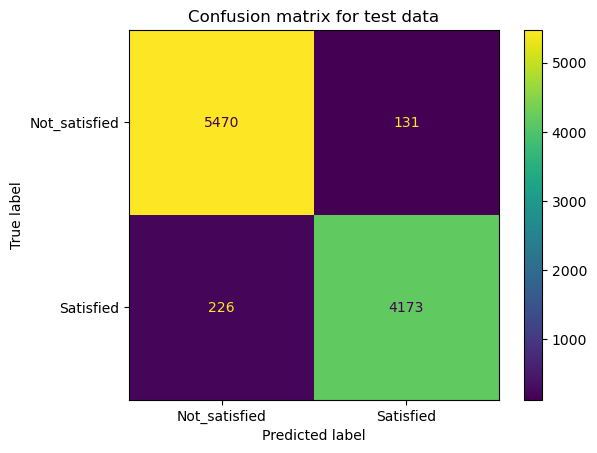

In [60]:
#confusion matrix
con_matrix_xgb_test=confusion_matrix(y_test, xgb_test_pred)      #to get confusion_matrix
#confusion matrix for train data
conf_xgb_test_disp = ConfusionMatrixDisplay(confusion_matrix = con_matrix_xgb_test, display_labels = class_names)
conf_xgb_test_disp.plot()
plt.title("Confusion matrix for test data")

# Ensemble Model Using Voting

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split

# Create individual models
model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = SVC(probability=True)
# model3 = SVC(probability=True)  # Note: probability=True for SVC to enable soft voting
model4 = RandomForestClassifier()
model5 = GradientBoostingClassifier()

# Create an ensemble model using voting
ensemble_model = VotingClassifier(estimators = [('lr', model1), ('knn', model2),('svc', model3), ('rf', model4), ('gb', model5)], voting='soft')

# Assuming you have your data (X, y), replace this with your actual data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 7)

# Train the ensemble model
ensemble_model.fit(x_train, y_train)

# Evaluate the ensemble model
accuracy = ensemble_model.score(x_test, y_test)
print(f'Ensemble Model Accuracy: {accuracy}')

Ensemble Model Accuracy: 0.9373
